# Employee Retention - People Analytics

## Goal:
### 1. Predict Employee Retention
####  ----create a table with 3 columns, day, employee_headcount, company_id
### 2. What are the main factors drive employee churn

In [811]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from ggplot import *

In [812]:
data = pd.read_csv(r'C:\Users\lshen\Downloads\employee_retention_data.csv')

In [813]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [814]:
data.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

In [815]:
data.shape

(24702, 7)

In [816]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

### change into proper data types

In [817]:
# change join and quit date's type to date time
# one way -----data['join_date'] = data.join_date.astype(datetime.datetime)
data['join_date'] = pd.to_datetime(data.join_date)
data['quit_date'] = pd.to_datetime(data.quit_date)

In [818]:
data.dtypes

employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [819]:
data.describe(include = 'all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


### Get new hire number for each company by each day

In [820]:
new_hire_by_date = data.groupby(['company_id','join_date'], as_index = False).employee_id.count()

In [821]:
new_hire_by_date.columns = ['company_id','day','new_hire_count']

In [822]:
new_hire_by_date.head()

,company_id,day,new_hire_count
0,1,2011-01-24,25
1,1,2011-01-25,2
2,1,2011-01-26,2
3,1,2011-01-31,30
4,1,2011-02-01,7


In [823]:
new_hire_by_date.tail()

,company_id,day,new_hire_count
5125,12,2014-05-19,2
5126,12,2014-10-13,1
5127,12,2015-03-23,1
5128,12,2015-07-06,1
5129,12,2015-07-27,1


### Get quitted number for each company each day

In [824]:
quit_by_date = data.groupby(['company_id','quit_date'],as_index=False).employee_id.count()

In [825]:
quit_by_date.columns = ['company_id','day','quit_count']

In [826]:
quit_by_date.head()

,company_id,day,quit_count
0,1,2011-10-21,1
1,1,2011-11-11,1
2,1,2011-11-22,1
3,1,2011-11-25,1
4,1,2011-12-09,1


### Create a dataframe storing the date from start to end

In [827]:
start_date = '2011-01-23'
end_date = '2015-12-13'

In [828]:
# continuous day dataframe
d = pd.DataFrame(pd.date_range(start_date, end_date),columns = ['day'])

In [829]:
d.head()

,day
0,2011-01-23
1,2011-01-24
2,2011-01-25
3,2011-01-26
4,2011-01-27


### Get the company list

In [830]:
company_list = data.company_id.unique()

In [831]:
company_list

array([ 7,  4,  2,  9,  1,  6, 10,  5,  3,  8, 11, 12], dtype=int64)

In [832]:
company_list.sort()

In [833]:
company_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [834]:
c = pd.DataFrame(company_list,columns=['company_id'])

### Cross Join date and company list

In [835]:
# merge on a dummy column and drop it
headcount = d.assign(foo = 1).merge(c.assign(foo=1)).drop('foo',1)

In [836]:
headcount.tail()

,day,company_id
21427,2015-12-13,8
21428,2015-12-13,9
21429,2015-12-13,10
21430,2015-12-13,11
21431,2015-12-13,12


### merge with new_hire and quit data

In [837]:
headcount = (headcount.merge(new_hire_by_date, how='left',\
                             on=['day','company_id']).fillna(0)).merge(quit_by_date, how='left',\
                                                                                on =['day','company_id']).fillna(0)

In [838]:
headcount.head(24)

,day,company_id,new_hire_count,quit_count
0,2011-01-23,1,0.0,0.0
1,2011-01-23,2,0.0,0.0
2,2011-01-23,3,0.0,0.0
3,2011-01-23,4,0.0,0.0
4,2011-01-23,5,0.0,0.0
5,2011-01-23,6,0.0,0.0
6,2011-01-23,7,0.0,0.0
7,2011-01-23,8,0.0,0.0
8,2011-01-23,9,0.0,0.0
9,2011-01-23,10,0.0,0.0


Calculate net headcount change per day

In [839]:
headcount['head_count_net_change']=headcount.new_hire_count - headcount.quit_count

### Answer#1:Get the headcount per day per company

Get the cumulative sum of headcount per day per company

In [840]:
cumsums = headcount[['company_id','head_count_net_change']].groupby(['company_id']).cumsum()

In [841]:
cumsums.columns = ['head_count']

In [842]:
len(cumsums)

21432

In [843]:
headcount = pd.concat([headcount,cumsums], axis = 1)

In [844]:
headcount.tail()

,day,company_id,new_hire_count,quit_count,head_count_net_change,head_count
21427,2015-12-13,8,0.0,0.0,0.0,468.0
21428,2015-12-13,9,0.0,0.0,0.0,432.0
21429,2015-12-13,10,0.0,0.0,0.0,385.0
21430,2015-12-13,11,0.0,0.0,0.0,4.0
21431,2015-12-13,12,0.0,0.0,0.0,12.0


### Check the factors drive employee churn

### check employment length

Get the timedelta between join and quit

In [845]:
data['emp_length'] = data.quit_date-data.join_date

In [846]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,emp_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days


In [847]:
data.dtypes

employee_id            float64
company_id               int64
dept                    object
seniority                int64
salary                 float64
join_date       datetime64[ns]
quit_date       datetime64[ns]
emp_length     timedelta64[ns]
dtype: object

In [848]:
data.emp_length.describe()

count                       13510
mean     613 days 11:41:01.643227
std      328 days 14:56:33.800149
min             102 days 00:00:00
25%             361 days 00:00:00
50%             417 days 00:00:00
75%             781 days 00:00:00
max            1726 days 00:00:00
Name: emp_length, dtype: object

In [862]:
data.emp_length.value_counts().head()

375 days    370
361 days    368
354 days    367
368 days    333
382 days    325
Name: emp_length, dtype: int64

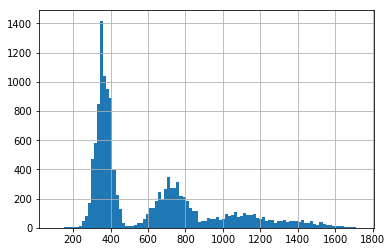

In [860]:
# need to convert timedelta datatype to day or hour or min or second before plot
((data.emp_length.dropna() / np.timedelta64(1, 'D'))).hist(bins=100)

Observation:<br>
- Very high churn rate at the beginning of the second year of employment<br>
- relatively high churn rate between 1.5 to 2 years of employment

### Dig deeper

Since it has such a clear pattern, let's dig into deeper.<br>
Break into two groups: quitted early and not(if they haven’t been in the current
company for at least 13 months, we remove them)<br>
Let's define the early quitters are the ones quitted before 13 months

In [930]:
# get data quitted before 13 months
early_quitter = data[data.emp_length/np.timedelta64(1,'D') < 365+30]

In [929]:
early_quitter.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,emp_length
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
12,939058.0,1,marketing,1,48000.0,2012-12-10,2013-11-15,340 days
14,461248.0,2,sales,20,201000.0,2013-09-16,2014-08-22,340 days
21,219944.0,6,customer_service,15,98000.0,2012-06-25,2013-05-31,340 days


In [931]:
last_day = pd.to_datetime("2015-12-13")

In [932]:
last_day

Timestamp('2015-12-13 00:00:00')

In [944]:
# get the data not early quitter and exclude the ones employed less than 13 months
longer_emp = data[((last_day - data.join_date)/np.timedelta64(1,'D') >365+30)\
    &(data.emp_length/np.timedelta64(1,'D') > 365+30)]

In [945]:
longer_emp.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,emp_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578 days
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,1047 days
10,892155.0,6,customer_service,13,72000.0,2012-11-12,2015-02-27,837 days


might use decision tree here to model it

In [949]:
early_quitter.salary.describe()

count      5654.000000
mean     131393.880439
std       65464.211853
min       17000.000000
25%       81000.000000
50%      122000.000000
75%      173000.000000
max      372000.000000
Name: salary, dtype: float64

In [950]:
longer_emp.salary.describe()

count      7795.000000
mean     138768.313021
std       75379.904785
min       19000.000000
25%       80000.000000
50%      123000.000000
75%      187000.000000
max      379000.000000
Name: salary, dtype: float64

### Check week of year-quit time

In [850]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,emp_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days


In [868]:
# get week of the year
week = data.quit_date.dropna().dt.week

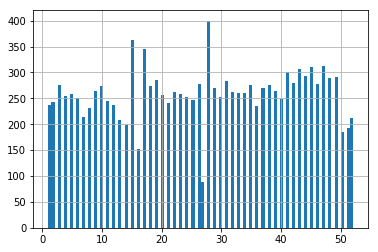

In [869]:
week.hist(bins = 100)

Observation:<br>
No significant pattern

### Check if different dept matters

In [876]:
# dept quitted
dept_q = data[data['quit_date'].notnull()].dept

In [879]:
# percentage of churned in each dept
dept.value_counts()/data.dept.value_counts()

customer_service    0.554902
data_science        0.527273
design              0.563768
engineer            0.512031
marketing           0.562993
sales               0.570933
Name: dept, dtype: float64

Observation:
No significant diff

### Seniority

In [888]:
s = data[data['quit_date'].notnull()].seniority.value_counts()/data.seniority.value_counts()

In [889]:
s

1     0.499419
2     0.530786
3     0.507378
4     0.471508
5     0.569444
6     0.601053
7     0.550647
8     0.581349
9     0.552966
10    0.564186
11    0.554113
12    0.590081
13    0.559284
14    0.552174
15    0.554336
16    0.570513
17    0.535274
18    0.524083
19    0.546154
20    0.555687
21    0.581841
22    0.530105
23    0.547771
24    0.535666
25    0.563636
26    0.517291
27    0.532710
28    0.547009
29    0.492013
98    1.000000
99    1.000000
Name: seniority, dtype: float64

In [890]:
s_df = pd.DataFrame(s)

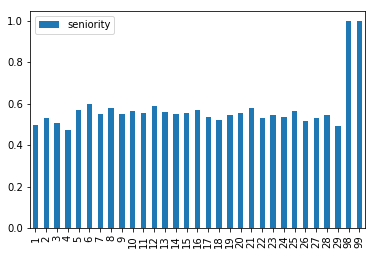

In [892]:
s_df.plot(kind = 'bar')

Observation:
No significant diff

## Conclusions:

1. Empolyee quit at their working anniversaries and has a extremly high churn rate at the first and second year.<br>
2. Salary is an import factor.(need to dig deeper).Employees with low and high salaries are less likely to quit. Probably because employees with high
salaries are happy there and employees with low salaries are not that marketable, so they have a
hard time finding a new job.